# Programming Lesson and Exercises - DAS <span class="tocSkip"></span>

These programming lessons do not require prior programming experience.

The goal is to teach you the use of _Python 3_ and the _Jupyter Notebook_ software
in the context of _Data Analytics_.

<div class="alert-info alert" role="alert-info">While you read this notebook,
execute all code cells in linear order
from the beginning</div>


# Introduction to this template notebook

* This is a **personal** notebook.
* Make sure you work in a **copy** of `...-template.ipynb`,
**renamed** to `...-yourIDnr.ipynb`,
where `yourIDnr` is your TU/e identification number.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be executed individually and independently.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

You are expected to work with Python code in this notebook.

The locations where you should write your solutions can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
<br/>
NEVER write code <i>outside</i> the marked blocks.
Such code cannot be evaluated.
</div>

Proceed in this notebook as follows:
* **Read** the text.
* **Fill in** your solutions between `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

**Personalize your notebook**:
1. Copy the following three lines of code:

  ```python
  AUTHOR_NAME = 'Your Full Name'
  AUTHOR_ID_NR = '1234567'
  AUTHOR_DATE = 'YYYY-MM-DD'  # when notebook was first modified, e.g. '2019-02-26'
  ```

1. Paste them between the marker lines in the next code cell.
1. Fill in your _full name_, _identification number_, and the current _date_ as strings between quotes.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [172]:
#// BEGIN_TODO [Author] Name, Id.nr., Date, as strings (1 point)

AUTHOR_NAME = 'Kyra Moviat'
AUTHOR_ID_NR = '1349171'
AUTHOR_DATE = '2019-03-11'

#// END_TODO [Author]

AUTHOR_NAME, AUTHOR_ID_NR, AUTHOR_DATE

('Kyra Moviat', '1349171', '2019-03-11')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Loading-the-libraries" data-toc-modified-id="Loading-the-libraries-0.1">Loading the libraries</a></span></li></ul></li><li><span><a href="#Lesson-introduction" data-toc-modified-id="Lesson-introduction-1">Lesson introduction</a></span></li><li><span><a href="#1.-Filtering" data-toc-modified-id="1.-Filtering-2"><span class="section">1.</span> Filtering</a></span><ul class="toc-item"><li><span><a href="#Rolling-windows" data-toc-modified-id="Rolling-windows-2.1">Rolling windows</a></span></li><li><span><a href="#Filtering-mouse-trajectories" data-toc-modified-id="Filtering-mouse-trajectories-2.2">Filtering mouse trajectories</a></span></li><li><span><a href="#Computing-changes-and-finding-maxima" data-toc-modified-id="Computing-changes-and-finding-maxima-2.3">Computing changes and finding maxima</a></span></li><li><span><a href="#Approximating-derivatives-and-finding-trends" data-toc-modified-id="Approximating-derivatives-and-finding-trends-2.4">Approximating derivatives and finding trends</a></span></li></ul></li><li><span><a href="#2.-Data-aggregation" data-toc-modified-id="2.-Data-aggregation-3"><span class="section">2.</span> Data aggregation</a></span><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3.1">Data preparation</a></span></li><li><span><a href="#Data-aggregation" data-toc-modified-id="Data-aggregation-3.2">Data aggregation</a></span></li></ul></li><li><span><a href="#3.-Empirical-cumulative-distribution-functions" data-toc-modified-id="3.-Empirical-cumulative-distribution-functions-4"><span class="section">3.</span> Empirical cumulative distribution functions</a></span><ul class="toc-item"><li><span><a href="#Exercises:-compare-ECDFs-for-mouse-a-trackpad-trajectories" data-toc-modified-id="Exercises:-compare-ECDFs-for-mouse-a-trackpad-trajectories-4.1">Exercises: compare ECDFs for mouse a trackpad trajectories</a></span></li></ul></li><li><span><a href="#4.-Dates-and-Times" data-toc-modified-id="4.-Dates-and-Times-5"><span class="section">4.</span> Dates and Times</a></span><ul class="toc-item"><li><span><a href="#Learning-Objectives-of-This-Section" data-toc-modified-id="Learning-Objectives-of-This-Section-5.1">Learning Objectives of This Section</a></span></li><li><span><a href="#Why-dates-and-times-are-complicated" data-toc-modified-id="Why-dates-and-times-are-complicated-5.2">Why dates and times are complicated</a></span></li><li><span><a href="#Working-with-dates-and-times-with-Pandas" data-toc-modified-id="Working-with-dates-and-times-with-Pandas-5.3">Working with dates and times with Pandas</a></span></li></ul></li><li><span><a href="#5.-Exercise:-Find-ballistic-motion" data-toc-modified-id="5.-Exercise:-Find-ballistic-motion-6"><span class="section">5.</span> Exercise: Find ballistic motion</a></span></li><li><span><a href="#(End-of-Notebook)" data-toc-modified-id="(End-of-Notebook)-7">(End of Notebook)</a></span></li></ul></div>

## Loading the libraries

To show examples, we load some Data Analytics libraries first:

In [173]:
import numpy as np  # import auxiliary library, typical idiom
import pandas as pd  # import the Pandas library, typical idiom

from statsmodels.distributions.empirical_distribution import ECDF

from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter1d
from scipy import stats

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

from mouse_experiment import MouseExperiment

# Lesson introduction

In these lessons, we are going to extract features from the mouse trajectories recorded in the Fitts' law experiment. We will first extract features by filtering signals. For this, we will need to learn:

* how to filter signals in _Python_
* how to work with some new _Pandas_ functions

Next, we will extract more features and perform aggregation over the recorded data and will learn

* how to use the _Pandas_ **`agg()`** for convenient aggregation and computation of simple features
* how to combine/join two _Pandas_ tables with the function **`join()`**
* how to compute, use and plot empirical cumulative distribution functions

Finally, we will learn 

* how to work with dates and times


# <span class="section">1.</span> Filtering



To illustrate how to filter signals, we will apply filtering to the (time series in the) _stocks_ data set that we have also seen in the visualization exercises. In the exercises that follow, you will apply what you have learned to recorded mouse trajectories.

This time, the _stocks_ data set contains the _daily_ (rather than the monthly) closing value of the NASDAQ index. We first load the data into a dataframe `df_nasdaq`.

In [174]:
df_nasdaq = pd.read_csv('datasets/NASDAQ.csv', parse_dates=[0])
df_nasdaq = df_nasdaq.set_index('Date')[['Close']]
df_nasdaq.columns = ['close']
df_nasdaq.head()

,close
Date,
2007-01-03,2423.159912
2007-01-04,2453.429932
2007-01-05,2434.250000
2007-01-08,2438.199951
2007-01-09,2443.830078


Let us plot the daily closing index.

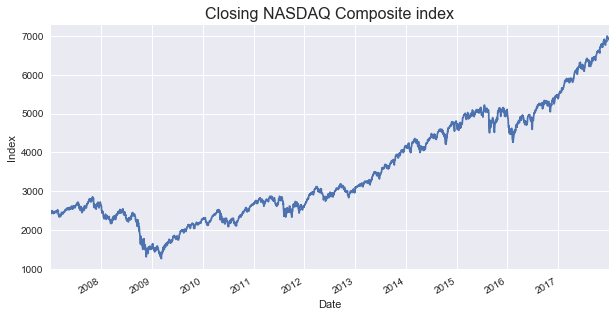

In [175]:
ax = df_nasdaq['close'].plot()
ax.set_ylabel('Index')
ax.set_title('Closing NASDAQ Composite index',fontsize=16);

As you can see, the closing price is very volatile. If we want to approximate the graph by a curve that is more smooth, we can do so by _filtering_. In this case, we apply a Gaussian filter. We store the filtered data in a column called `'close_filtered'`. The Gaussian filter needs a parameter `sigma`, the standard deviation, which gives an indication of the width of the applied filter. We choose `sigma` to be `30` (days). 

(There are different ways to deal with the boundaries. We choose the mode `'nearest'`, since for the later exercises it is the most natural choice.)

In [176]:
df_nasdaq['close_filtered'] = gaussian_filter1d(df_nasdaq['close'], sigma=30, mode='nearest')
df_nasdaq.head()

,close,close_filtered
Date,,
2007-01-03,2423.159912,2438.967378
2007-01-04,2453.429932,2439.354293
2007-01-05,2434.250000,2439.740575
2007-01-08,2438.199951,2440.126123
2007-01-09,2443.830078,2440.511070


Let us plot the filtered data together with the original prices in one figure.

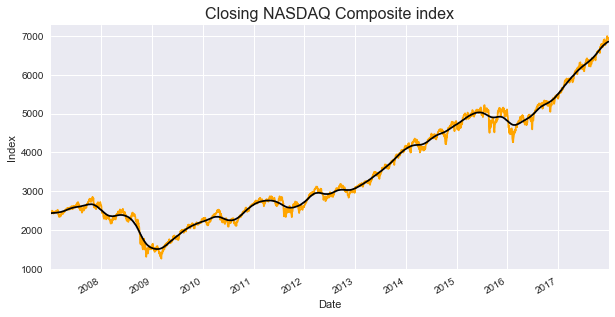

In [177]:
ax_nasdaq = df_nasdaq['close'].plot(color='orange')
df_nasdaq['close_filtered'].plot(ax = ax_nasdaq, color='black');
ax_nasdaq.set_title('Closing NASDAQ Composite index',fontsize=16);
ax_nasdaq.set_ylabel('Index')

## Rolling windows

There are many more ways to filter signals, each with their own advantages and disadvantages. A **median filter** is not so sensitive to outliers as a Gaussian filter.

The Pandas function **`rolling()`** lets you compute rolling-window statistics, such as a rolling median. To use it, you need to specify the size of the window. In the following example, we used a window size of `5`. You can then apply a statistic to the result: in our median-filter example, we calculate the `median`. 

In [178]:
df_nasdaq['median_filtered'] = df_nasdaq['close'].rolling(5).median()
df_nasdaq.head(10)

,close,close_filtered,median_filtered
Date,,,
2007-01-03,2423.159912,2438.967378,NaN
2007-01-04,2453.429932,2439.354293,NaN
2007-01-05,2434.250000,2439.740575,NaN
2007-01-08,2438.199951,2440.126123,NaN
2007-01-09,2443.830078,2440.511070,2438.199951
2007-01-10,2459.330078,2440.895398,2443.830078
2007-01-11,2484.850098,2441.279204,2443.830078
2007-01-12,2502.820068,2441.662644,2459.330078
2007-01-16,2497.780029,2442.045911,2484.850098


In every row of the resulting series, you get the median of the values in the window. Standardly, the right boundary of the window coincides with the current row. So if you have a window size of `k`, the result in the `n`th row is the median of the rows `n-k+1, n-k+2` up to `n`. Because for small `n` not all of these rows exist, you typically get `NaN` values in some of the first rows.

Let us plot the filtered data together with the original prices in one figure.

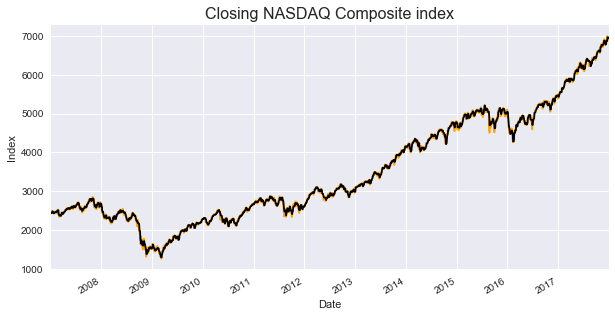

In [179]:
ax_nasdaq = df_nasdaq['close'].plot(color='orange')
df_nasdaq['median_filtered'].plot(ax=ax_nasdaq, color='black');
ax_nasdaq.set_title('Closing NASDAQ Composite index',fontsize=16);
ax_nasdaq.set_ylabel('Index');

## Filtering mouse trajectories

Now we will apply the filtering to recorded mouse trajectories.

First, record some mouse trajectories: When you execute the following code cell the application will start in a new window. (Note: it may be minimized, in which case you may need to find it in the task bar). Next, draw some trajectories to work with. When you close the window, the trajectories to use will be stored in the dataframe `df_paths`.

> **Important:** Record at least one trajectory each time you start working on the exercises below, or when you have clicked `Restart & Run All`.

> **Hint:** It is easier to understand the next exercises if you **make a drawing, such as a triangle or a square**, instead of drawing straight lines.

In [180]:
experiment     = MouseExperiment()
_, df_paths, _ = experiment.start()

We print below the first five rows of `df_paths`.

In [181]:
df_paths.head()

,t,trial,x,y
0,0.000,67,-1.000000,-2.000000
1,0.001,67,-0.998431,-1.997646
2,0.002,67,-0.996862,-1.995293
3,0.003,67,-0.995293,-1.992939
4,0.004,67,-0.993724,-1.990585


The meaning of the different columns is as follows:
* The **`'trial'`** column contains a unique number per trajectory
* The **`'t'`** column contains contains the time since the start of the trial in ms
* The **`'x'`** column contains the $x$-coordinate of the path in pixels
* The **`'y'`** column contains the $y$-coordinate of the path in pixels

<blockquote>
<div class="alert-danger alert">
    <b>IMPORTANT:</b> The code you write in the exercises below will be tested on different test trajectories. Therefore, make sure your code works also when you record _new_ trajectories. <b>Test this a few times.</b>
</div>
</blockquote>

### Exercise <span class="exercise">1.a</span>: Visualize the paths

Plot the paths obtained from the experiment, i.e. those stored in `df_paths`, in one figure, with both axes ranging from -300 to 300. Recall that different paths have a different `'trial'` number.

Here is an example of a possible result for two mouse trajectories:

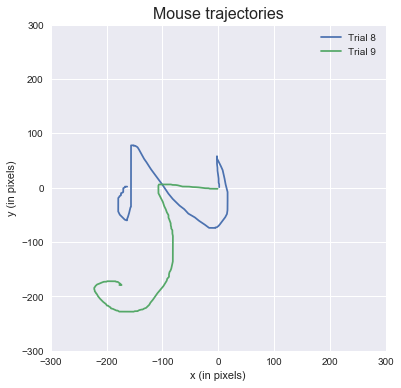

> **Hint:** You can plot two columns labeled `'col_1'` and `'col_2'` from a dataframe or a groupby object against each other by providing the arguments `x='col_1`' and `y='col_2'` to the plot function

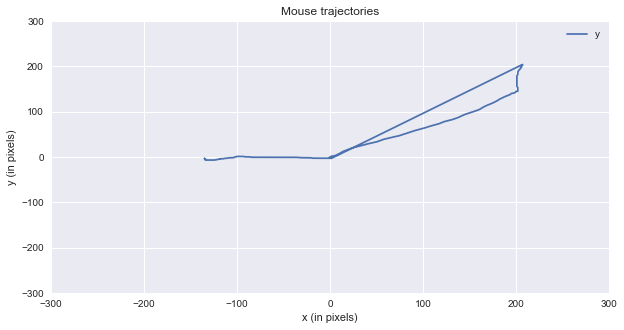

In [182]:
#// BEGIN_TODO [DAS_1a] Visualize the paths (1 point)

# df_paths
# ax_nasdaq = df_nasdaq['close'].plot(color='orange')
# df_nasdaq['close_filtered'].plot(ax = ax_nasdaq, color='black');
# ax_nasdaq.set_title('Closing NASDAQ Composite index',fontsize=16);
# ax_nasdaq.set_ylabel('Index')

ax_paths = df_paths.plot(x='x', y='y')
ax_paths.set_xlim(-300,300)
ax_paths.set_ylim(-300,300)
ax_paths.set_title('Mouse trajectories')
ax_paths.set_ylabel('y (in pixels)')
ax_paths.set_xlabel('x (in pixels)');

#// END_TODO [DAS_1a]

### Exercise <span class="exercise">1.b</span>: Select data

Select the data from the last recorded trajectory using a boolean mask, and store it in a dataframe named `df_last_path`. Then plot the path. Set the limits of both axes from -300 to 300.

,t,trial,x,y
0,0.000,68,2.000000,-3.0
1,0.001,68,1.996416,-3.0
2,0.002,68,1.992832,-3.0
3,0.003,68,1.989249,-3.0
4,0.004,68,1.985665,-3.0


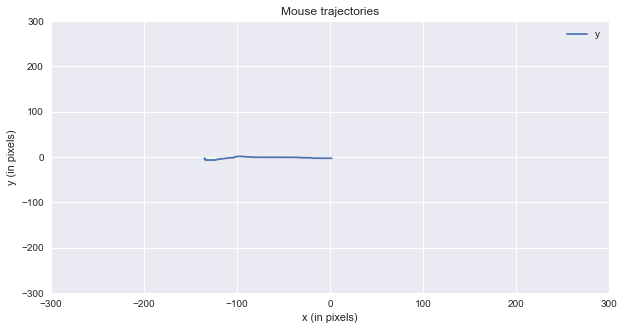

In [183]:
#// BEGIN_TODO [DAS_1b] Select data (1 point)

last_trial = df_paths['trial'].max()
booltemp = df_paths['trial']==last_trial;
df_last_path = df_paths[booltemp]

ax_pathss = df_last_path.plot(x='x', y='y')
ax_pathss.set_xlim(-300,300)
ax_pathss.set_ylim(-300,300)
ax_pathss.set_title('Mouse trajectories')
ax_pathss.set_ylabel('y (in pixels)')
ax_pathss.set_xlabel('x (in pixels)');

#// END_TODO [DAS_1b]

df_last_path.head()

> **Hint:** After doing this exercise, go back and record some new mouse trajectories. Then, execute the code that you wrote for the previous exercises again, **without modifying it first**. It should again select the path that you drew last.

### Exercise <span class="exercise">1.c</span>: Gaussian filter

Use a Gaussian filter with standard deviation of $25$ ms, to approximate the $x$- and $y$- coordinates of the trajectory in `df_last_path`. Store the $x$- and $y$-coordinates of the regularized path in columns labeled `'filt_x'` and `'filt_y'` respectively. Then use a Gaussian filter with standard deviation of $200$ ms, and store the regularized path in columns labeled `'filt_x_coarse'` and `'filt_y_coarse'`.
Finally, plot the original and the two regularized paths in one figure, with both axes ranging from -300 to 300.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

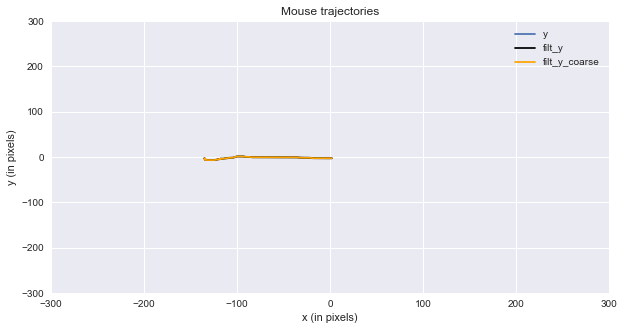

In [184]:
#// BEGIN_TODO [DAS_1c] Gaussian filter (1 point)

#df_nasdaq['close_filtered'] = gaussian_filter1d(df_nasdaq['close'], sigma=30, mode='nearest')

df_last_path['filt_x'] = gaussian_filter1d(df_last_path['x'], sigma=0.025, mode='nearest')
df_last_path['filt_y'] = gaussian_filter1d(df_last_path['y'], sigma=0.025, mode='nearest')
df_last_path['filt_x_coarse'] = gaussian_filter1d(df_last_path['x'], sigma=0.2, mode='nearest')
df_last_path['filt_y_coarse'] = gaussian_filter1d(df_last_path['y'], sigma=0.2, mode='nearest')

# ax_nasdaq = df_nasdaq['close'].plot(color='orange')
# df_nasdaq['median_filtered'].plot(ax=ax_nasdaq, color='black');
# ax_nasdaq.set_title('Closing NASDAQ Composite index',fontsize=16);
# ax_nasdaq.set_ylabel('Index');

ax_pathsss = df_last_path.plot(x='x', y='y')
df_last_path.plot(ax=ax_pathsss, x='filt_x', y='filt_y', color='black')
df_last_path.plot(ax=ax_pathsss, x='filt_x_coarse', y='filt_y_coarse', color='orange')
ax_pathsss.set_xlim(-300,300)
ax_pathsss.set_ylim(-300,300)
ax_pathsss.set_title('Mouse trajectories')
ax_pathsss.set_ylabel('y (in pixels)')
ax_pathsss.set_xlabel('x (in pixels)');

#// END_TODO [DAS_1c]

Which filtered trajectory approximates the original curve best?

### Exercise <span class="exercise">1.d</span>: Median filter

Now use a median filter, with a window size of `25` to approximate the $x-$ and $y-$ coordinates of the paths. Add the median-filtered paths to the dataframe `df_last_path` as columns named `'med_filt_x'` and `'med_filt_y'`. Similarly, use a median filter with window size of `200` and add coordinates of the regularized path as columns `'med_filt_x_coarse'` and `'med_filt_y_coarse'`. 

The `NaN`s may hinder plotting, so create a new dataframe `df_last_path_dropna` which should be the dataframe `df_last_path` without the rows containing `NaN`s. Then plot the median-filtered paths in `df_last_path_dropna` in the same figure as the original path.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

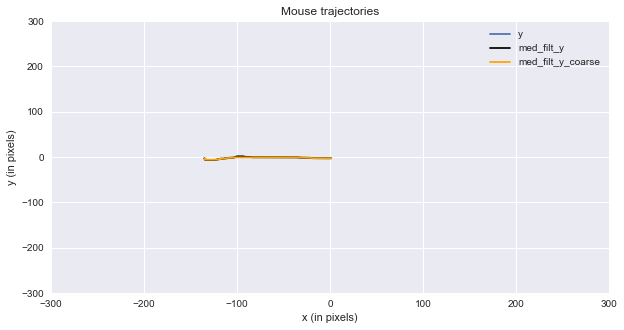

In [185]:
#// BEGIN_TODO [DAS_1d] Median filter (1 point)

#df_nasdaq['median_filtered'] = df_nasdaq['close'].rolling(5).median()
df_last_path['med_filt_x'] = df_last_path['x'].rolling(25).median()
df_last_path['med_filt_y'] = df_last_path['y'].rolling(25).median()
df_last_path['med_filt_x_coarse'] = df_last_path['x'].rolling(200).median()
df_last_path['med_filt_y_coarse'] = df_last_path['y'].rolling(200).median()

# #country_data[country_data['tld'].isnull()]
# nans = df_last_path['med_filt_y_coarse'].isnull()
# #country_data.drop(country_data[countries_in_EU].index)
# df_last_path_dropna = df_last_path.drop(df_last_path[nans].index)

df_last_path_dropna = df_last_path.dropna()

ax_pathssss = df_last_path_dropna.plot(x='x', y='y')
df_last_path_dropna.plot(ax=ax_pathssss, x='med_filt_x', y='med_filt_y', color='black')
df_last_path_dropna.plot(ax=ax_pathssss, x='med_filt_x_coarse', y='med_filt_y_coarse', color='orange')
ax_pathssss.set_xlim(-300,300)
ax_pathssss.set_ylim(-300,300)
ax_pathssss.set_title('Mouse trajectories')
ax_pathssss.set_ylabel('y (in pixels)')
ax_pathssss.set_xlabel('x (in pixels)');

#// END_TODO [DAS_1d]

What differences do you see with respect to the Gaussian-filtered trajectories? You can experiment by drawing different trajectories.

## Computing changes and finding maxima

We will now introduce several new _Pandas_ functions. To illustrate their use, we consider the following example question:

_At what day was the biggest drop in the NASDAQ index?_

We approach this as follows. First, we calculate the differences between consecutive rows in a _Series_ with the _Pandas_ function **`diff()`**. We use it to add a new column, labeled `'close_diff'`, to the dataframe `df_nasdaq`.

In [186]:
df_nasdaq['close_diff'] = df_nasdaq['close'].diff()

df_nasdaq[['close', 'close_diff']].head()

,close,close_diff
Date,,
2007-01-03,2423.159912,NaN
2007-01-04,2453.429932,30.270020
2007-01-05,2434.250000,-19.179932
2007-01-08,2438.199951,3.949951
2007-01-09,2443.830078,5.630127


For all rows, except the first, you can see that the value in the `'close_diff'` column is exactly the value in the `'close'` column in the same row, minus the value in the `'close'` column in the previous row. In the first row, you see a `NaN`, because _Pandas_ cannot calculate the difference between the first row and the row before that, because the latter does not exist.

Next, we want to know at which date the drop of the index was the largest. In other words, we are interested for which `'Date'`, the change in closing value was the smallest (i.e. the most negative). We can find this out with the Pandas function **`idxmin()`**.

In [187]:
date_min = df_nasdaq['close_diff'].idxmin()
date_min

Timestamp('2016-06-24 00:00:00')

Apparently, the value drop was the largest on the 24th of June in 2016. 

The output is in an unusual format. We will revisit dates and times in Python later. For now, let us see what the drop in index actually was.

In [188]:
df_nasdaq.loc[date_min, 'close_diff']

-202.06005900000036

Similarly, we can find out the date with the largest increase of the NASDAQ index by using the Pandas function **`idxmax()`**.

In [189]:
date_max = df_nasdaq['close_diff'].idxmax()
date_max

Timestamp('2008-10-13 00:00:00')

The increase in closing index was

In [190]:
df_nasdaq.loc[date_max,'close_diff']

194.73999000000003

If we sum all the differences up to a particular row, and add it to the initial value, we should get back the difference between the value in that row and the value in the initial row. We can compute such a _cumulative sum_ with the _Pandas_ function **`cumsum()`**. We add the column with cumulative sums to the dataframe as a new column labeled `'close_diff_cumulative'`. We also add a column labeled `'change_since_beginning'` in which we directly calculate the difference between the current value and the first value. The last two columns should then have the same values.

In [191]:
df_nasdaq['close_diff_cumulative'] = df_nasdaq['close_diff'].cumsum()
df_nasdaq['change_since_beginning'] = df_nasdaq['close'] - df_nasdaq['close'].iloc[0]
df_nasdaq[['close','close_diff','close_diff_cumulative','change_since_beginning']].head()

,close,close_diff,close_diff_cumulative,change_since_beginning
Date,,,,
2007-01-03,2423.159912,NaN,NaN,0.000000
2007-01-04,2453.429932,30.270020,30.270020,30.270020
2007-01-05,2434.250000,-19.179932,11.090088,11.090088
2007-01-08,2438.199951,3.949951,15.040039,15.040039
2007-01-09,2443.830078,5.630127,20.670166,20.670166


The values in the last two columns indeed coincide (except for the first row due to the `NaN`s).

To get an impression of how volatile the NASDAQ index is, we may also be interested in the total absolute change up to a particular date. To get the absolute change from `'close_diff'` we could use the _Pandas_ function `abs()`, however, for the exercises later it is helpful if we show an alternative way.

In [192]:
df_nasdaq['abs_change'] = (df_nasdaq['close_diff']**2)**(1/2)
df_nasdaq['total_abs_change'] = df_nasdaq['abs_change'].cumsum()
df_nasdaq[['close','close_diff','abs_change','total_abs_change']].tail()

,close,close_diff,abs_change,total_abs_change
Date,,,,
2017-12-22,6959.959961,-5.399902,5.399902,76266.365519
2017-12-26,6936.250000,-23.709961,23.709961,76290.075480
2017-12-27,6939.339844,3.089844,3.089844,76293.165324
2017-12-28,6950.160156,10.820312,10.820312,76303.985636
2017-12-29,6903.390137,-46.770019,46.770019,76350.755655


### Exercise <span class="exercise">1.e</span>: Lengths of line segments

Add a new column to the dataframe `df_last_path`, with the label `'segment_length'`, containing in every row the length of the line segment between the $(x,y)$-coordinate of the current row and the previous row. In the first row, manually set the value of `'segment_length'` to `0`.

In [193]:
#// BEGIN_TODO [DAS_1e] Lengths of line segments (1 point)

df_last_path['segment_length'] = ((df_last_path['x'].diff()**2) + (df_last_path['y'].diff()**2))**0.5
df_last_path['segment_length'][0] = 0

#// END_TODO [DAS_1e]

df_last_path.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/i

,t,trial,x,y,filt_x,filt_y,filt_x_coarse,filt_y_coarse,med_filt_x,med_filt_y,med_filt_x_coarse,med_filt_y_coarse,segment_length
0,0.000,68,2.000000,-3.0,2.000000,-3.0,2.000000,-3.0,NaN,NaN,NaN,NaN,0.000000
1,0.001,68,1.996416,-3.0,1.996416,-3.0,1.996416,-3.0,NaN,NaN,NaN,NaN,0.003584
2,0.002,68,1.992832,-3.0,1.992832,-3.0,1.992832,-3.0,NaN,NaN,NaN,NaN,0.003584
3,0.003,68,1.989249,-3.0,1.989249,-3.0,1.989249,-3.0,NaN,NaN,NaN,NaN,0.003584
4,0.004,68,1.985665,-3.0,1.985665,-3.0,1.985665,-3.0,NaN,NaN,NaN,NaN,0.003584
5,0.005,68,1.982081,-3.0,1.982081,-3.0,1.982081,-3.0,NaN,NaN,NaN,NaN,0.003584
6,0.006,68,1.978497,-3.0,1.978497,-3.0,1.978497,-3.0,NaN,NaN,NaN,NaN,0.003584
7,0.007,68,1.974914,-3.0,1.974914,-3.0,1.974914,-3.0,NaN,NaN,NaN,NaN,0.003584
8,0.008,68,1.971330,-3.0,1.971330,-3.0,1.971330,-3.0,NaN,NaN,NaN,NaN,0.003584
9,0.009,68,1.967746,-3.0,1.967746,-3.0,1.967746,-3.0,NaN,NaN,NaN,NaN,0.003584


### Exercise <span class="exercise">1.f</span>: Compute path length

Add a new column named `'path_length'` to `df_last_path`, containing in every row the cumulative sum of the line segments so far. 

In [194]:
#// BEGIN_TODO [DAS_1f] Compute path length (1 point)


# last_trial = df_paths['trial'].max()
# booltemp = df_paths['trial']==last_trial;
# df_last_path = df_paths[booltemp]


df_last_path['path_length'] = df_last_path['segment_length'].cumsum()

#// END_TODO [DAS_1f]

df_last_path.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,t,trial,x,y,filt_x,filt_y,filt_x_coarse,filt_y_coarse,med_filt_x,med_filt_y,med_filt_x_coarse,med_filt_y_coarse,segment_length,path_length
0,0.000,68,2.000000,-3.0,2.000000,-3.0,2.000000,-3.0,NaN,NaN,NaN,NaN,0.000000,0.000000
1,0.001,68,1.996416,-3.0,1.996416,-3.0,1.996416,-3.0,NaN,NaN,NaN,NaN,0.003584,0.003584
2,0.002,68,1.992832,-3.0,1.992832,-3.0,1.992832,-3.0,NaN,NaN,NaN,NaN,0.003584,0.007168
3,0.003,68,1.989249,-3.0,1.989249,-3.0,1.989249,-3.0,NaN,NaN,NaN,NaN,0.003584,0.010751
4,0.004,68,1.985665,-3.0,1.985665,-3.0,1.985665,-3.0,NaN,NaN,NaN,NaN,0.003584,0.014335


The next step will be to estimate the speed of the trajectory at any given moment. For this, we need to know more about how to approximate derivatives.

## Approximating derivatives and finding trends

Suppose now that we are interested in finding some trends in the stock data. For instance, we want to find periods in which the NASDAQ index was generally increasing and periods in which it was decreasing. We could try to plot the differences between consecutive days in closing prices, but this signal is so volatile that it is impossible to extract some useful information out of it:

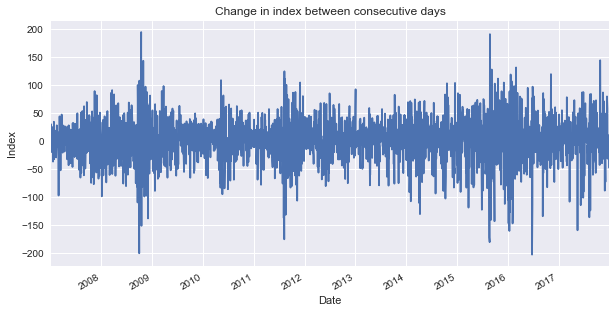

In [195]:
ax_marg = df_nasdaq['close_diff'].plot()
ax_marg.set_ylabel('Index')
ax_marg.set_title('Change in index between consecutive days');

You can use filtering to find an averaged derivative of the signal over a certain time window. For this, we apply a higher-order Gaussian filter to the original time signal. We indicate that we want a first-order filter by specifying the keyword argument `order=1`. (In general, `order=n` gives an approximation of the `n`th derivatives. The standard value for `order=0`, which just gives an approximation to the original function.) We choose a standard deviation `sigma=30` for the Gaussian filter. Derivatives are therefore averaged over a time period of approximately a month.

In [196]:
df_nasdaq['close_filtered_deriv'] = gaussian_filter1d(df_nasdaq['close'], sigma=30, order=1, mode='nearest')
df_nasdaq.head()

,close,close_filtered,median_filtered,close_diff,close_diff_cumulative,change_since_beginning,abs_change,total_abs_change,close_filtered_deriv
Date,,,,,,,,,
2007-01-03,2423.159912,2438.967378,NaN,NaN,NaN,0.000000,NaN,NaN,0.386445
2007-01-04,2453.429932,2439.354293,NaN,30.270020,30.270020,30.270020,30.270020,30.270020,0.385847
2007-01-05,2434.250000,2439.740575,NaN,-19.179932,11.090088,11.090088,19.179932,49.449952,0.385161
2007-01-08,2438.199951,2440.126123,NaN,3.949951,15.040039,15.040039,3.949951,53.399903,0.384430
2007-01-09,2443.830078,2440.511070,2438.199951,5.630127,20.670166,20.670166,5.630127,59.030030,0.383726


We visualize the approximate derivative in the graph below.

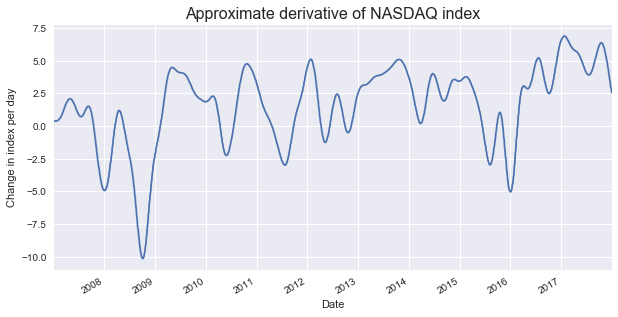

In [197]:
ax_deriv = df_nasdaq['close_filtered_deriv'].plot()
ax_deriv.set_title('Approximate derivative of NASDAQ index', fontsize=16);
ax_deriv.set_ylabel('Change in index per day');

### Exercise <span class="exercise" id="approximate_speed">1.g</span>: Compute approximate speed

Approximate the _speed_ (in pixels per ms) of the trajectory in `df_last_path` by applying a Gaussian filter of order $1$ to the path length. Store the result in a column `'approximate_speed'`. Use a standard deviation of $25$ ms.
Plot the result.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


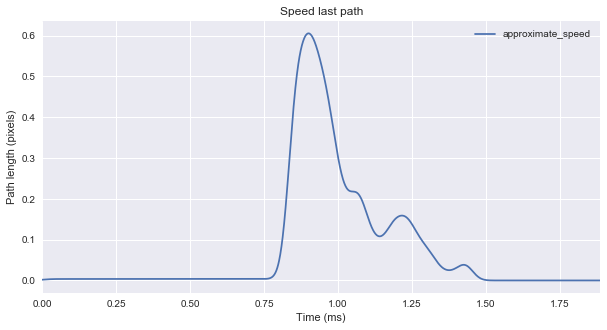

In [198]:
#// BEGIN_TODO [DAS_1g] Compute approximate speed (1 point)

#gaussian filter (df_nasdaq['close_filtered_deriv'] = gaussian_filter1d(df_nasdaq['close'], sigma=30, order=1, mode='nearest'))
#speed = path length / time
df_last_path['approximate_speed'] = (gaussian_filter1d(df_last_path['path_length'], sigma=25, order=1, mode='nearest')) #/ df_last_path['t'])

ax_last_path = df_last_path.plot(x='t', y='approximate_speed')
#ax_last_path.set_xlim(-300,300)
#ax_last_path.set_ylim(-300,300)
ax_last_path.set_title('Speed last path')
ax_last_path.set_ylabel('Path length (pixels)')
ax_last_path.set_xlabel('Time (ms)');

#// END_TODO [DAS_1g]

# <span class="section">2.</span> Data aggregation

In this section, we will compute more features of the data and introduce some very powerful _Pandas_ techniques:

* **Multi-level indexing**
* **Advanced data aggregation** with the function **`agg()`**
* **Joining** two dataframes with the function **`join()`**
* **Applying** a function, Series or dictionary to another Series with the function **`map()`**

Master these techniques, and you will be a truly skilled _Pandas_ user.

We work with the mouse trajectory data, which we load and prepare first. 

## Data preparation

We specify the names of the files in the following code cell. 

In [199]:
file_fitts = 'datasets/fitts.csv'
file_user_props = 'datasets/user_props.csv'
file_user_trial_props = 'datasets/user_trial_props.csv'

### Mouse trajectories

The actual trajectories are stored in `file_fitts`, which we read into the dataframe `df_fitts`. To create this file, we have processed recorded trajectories as in the previous section.

In [200]:
df_fitts = pd.read_csv(file_fitts)
df_fitts.head()

,user,trial,t,x,y,path_length,approximate_speed
0,1164,5,0.00,-2.0,1.000000,0.000000,0.001584
1,1164,5,0.02,-2.0,0.936582,0.063418,0.002497
2,1164,5,0.04,-2.0,0.873164,0.126836,0.002995
3,1164,5,0.06,-2.0,0.809747,0.190253,0.003142
4,1164,5,0.08,-2.0,0.746329,0.253671,0.003166


The dataframe is very similar to the one of the previous section. The biggest difference is that it contains paths recorded by more than one user. Each user is assigned a unique number, which is stored in the **`'user'`** column.

### Multi-level indexing

Every row is _uniquely_ identified by the **triple** of values in the `'user'`, `'trial'` and `'t'` column. The combination of this triple would make for an ideal index for the dataframe. Such an index that is made out of multiple components is called a **multi-level index** (sometimes called a hierarchical index or MultiIndex). We make the triple of columns `'user'`, `'trial'` and `'t'` into a multi-level index, by providing their names as a list to the `set_index()` function. 

In [201]:
df_fitts.set_index(['user','trial','t'], inplace=True)
df_fitts.head()

x         y  path_length  approximate_speed
user trial t                                                  
1164 5     0.00 -2.0  1.000000     0.000000           0.001584
           0.02 -2.0  0.936582     0.063418           0.002497
           0.04 -2.0  0.873164     0.126836           0.002995
           0.06 -2.0  0.809747     0.190253           0.003142
           0.08 -2.0  0.746329     0.253671           0.003166

### Properties of the users and the trajectories

The files `file_user_props` and `file_user_trial_props` contain tables similar to the ones you have created in the last exercise of ORG. We load `file_user_props` into the dataframe `df_user_props`. It contains the settings that are constant for each user.

In [202]:
df_user_props = pd.read_csv(file_user_props)
df_user_props.head()

,user,use_tue_laptop,right_handed,right_trackpad_handed,right_mouse_handed,gender,platform,platform_version
0,1,1,1,1,1,0,Windows,10
1,2,1,1,1,1,1,Windows,10
2,4,1,1,1,1,0,Windows,10
3,6,1,1,1,1,0,Windows,10
4,7,1,1,1,1,1,Windows,10


Every row in this table is uniquely identified by the integer in the `'user'` column. Therefore, we make this column the new index of the dataframe.

In [203]:
df_user_props.set_index('user',inplace = True)
df_user_props.head()

,use_tue_laptop,right_handed,right_trackpad_handed,right_mouse_handed,gender,platform,platform_version
user,,,,,,,
1,1,1,1,1,0,Windows,10
2,1,1,1,1,1,Windows,10
4,1,1,1,1,0,Windows,10
6,1,1,1,1,0,Windows,10
7,1,1,1,1,1,Windows,10


The explanation of the columns is as follows.

* **`'use_tue_laptop'`**: Whether user used a TU/e laptop
* **`'right_handed'`**: Whether user is right-handed or not
* **`'major'`**: The major of the user
* **`'gender'`**: The gender of the user
* **`'platform'`**: The operating system of the user
* **`'platform_version'`**: The version of the operating system of the user

### Conversion to readable table entries

Some of the columns contain integers that do not have a clear meaning. The interpretation of these integers is encoded by the following dictionaries.

In [204]:
dict_use_tue_laptop = {0 : False, 1 : True}
dict_right_handed = {0 : False, 1 : True}
dict_gender = {0 : 'Male', 1 : 'Female', 2 : 'Other'}

You can use these dictionaries to create more readable columns. But first there is a technical point that the values in for instance the column `'use_tue_laptop'` may be floats and not integers. So before you can use the dictionary, you would have to convert the column to integers.

In [205]:
df_user_props['use_tue_laptop'] = df_user_props['use_tue_laptop'].astype(int)

#### The _Pandas_ function **`map()`**

You can now use the _Pandas_ function **`map()`** with the argument `dict_use_tue_laptop` to map every `0` to a `False` and every `1` to a `True`.

In [206]:
df_user_props['use_tue_laptop'] = df_user_props['use_tue_laptop'].map(dict_use_tue_laptop)
df_user_props.head()

,use_tue_laptop,right_handed,right_trackpad_handed,right_mouse_handed,gender,platform,platform_version
user,,,,,,,
1,True,1,1,1,0,Windows,10
2,True,1,1,1,1,Windows,10
4,True,1,1,1,0,Windows,10
6,True,1,1,1,0,Windows,10
7,True,1,1,1,1,Windows,10


The properties stored in the file `file_user_trial_props` vary from trial to trial. We read those properties into the dataframe `df_user_trial_props`.

In [207]:
df_user_trial_props = pd.read_csv(file_user_trial_props)
df_user_trial_props.head()

,user,trial,delay,input_method,target_radius,target_x,target_y,total_time
0,1226,5,2.136719,0,6,-84,-84,3.607323
1,1226,6,3.540913,0,6,0,190,1.867664
2,1226,7,3.688381,0,6,-158,-158,1.645011
3,1226,8,2.823134,0,3,81,-81,1.776010
4,1226,9,3.690253,0,9,-157,157,1.567794


The meaning of these columns is as follows.

* **`'user'`**: an integer that identifies the user who drew the trajectory
* **`'trial'`**: an integer that identifies the trajectory. The pair of `'user'` and `'trial'` identify a trajectory uniquely
* **`'input_method'`**: whether the user used a trackpad or a mouse
* **`'touchpad_speed'`**: the speed setting of the trackpad (`0` is minimal, `20` is maximal)
* **`'mouse_speed'`**: the speed setting of the mouse (`0` is minimal, `20` is maximal)
* **`'target_x'`**: the $x$-coordinate of the target in pixels
* **`'target_y'`**: the $y$-coordinate of the target in pixels
* **`'target_radius'`**: the radius of the target in pixels
* **`'delay'`**: the time in seconds between the user moving the mouse on the red square in the origin, until the target appeared

The meaning of the values in the `'input_method'` columns is encoded by the following dictionary.

In [208]:
dict_input_method = { 0 : 'trackpad', 1 : 'mouse' }

Each row in the dataframe `df_user_trial_props` is uniquely determined by the pair of values in the `'user'` and `'trial'` column. This pair of values would therefore make for an ideal **multi-level index** of the dataframe.

### Exercise <span class="exercise">2.a</span>: Multi-level index for `df_user_trial_props`

 Change the index of the dataframe `df_user_trial_props` to a multi-level index consisting of the `'user'` and `'trial'` columns.

In [209]:
#// BEGIN_TODO [DAS_2a] Multi-level index (1 point)

# df_fitts.set_index(['user','trial','t'], inplace=True)
df_user_trial_props.set_index(['user', 'trial'], inplace=True)

#// END_TODO [DAS_2a]

df_user_trial_props.head()

delay  input_method  target_radius  target_x  target_y  \
user trial                                                              
1226 5      2.136719             0              6       -84       -84   
     6      3.540913             0              6         0       190   
     7      3.688381             0              6      -158      -158   
     8      2.823134             0              3        81       -81   
     9      3.690253             0              9      -157       157   

            total_time  
user trial              
1226 5        3.607323  
     6        1.867664  
     7        1.645011  
     8        1.776010  
     9        1.567794

### Exercise <span class="exercise">2.b</span>: Convert columns in dataframes

Use the dictionaries `dict_right_handed` and `dict_gender` to convert the data in the columns `'right_handed'` and `'gender'` in `df_user_props` to more readable values. Similarly, use the dictionary `dict_input_method` to convert the data in the column `'input_method'` in the dataframe `df_user_trial_props` to more readable values.

In [210]:
#// BEGIN_TODO [DAS_2b] Convert columns in dataframes (1 point)

# #user props
# dict_use_tue_laptop = {0 : False, 1 : True}
# dict_right_handed = {0 : False, 1 : True}
# dict_gender = {0 : 'Male', 1 : 'Female', 2 : 'Other'}
# #user trial props
# dict_input_method = { 0 : 'trackpad', 1 : 'mouse' }

# df_user_props['use_tue_laptop'] = df_user_props['use_tue_laptop'].astype(int)
# df_user_props['use_tue_laptop'] = df_user_props['use_tue_laptop'].map(dict_use_tue_laptop)

df_user_props['right_handed'] = df_user_props['right_handed'].astype(int)
df_user_props['right_handed'] = df_user_props['right_handed'].map(dict_right_handed)

df_user_props['gender'] = df_user_props['gender'].astype(int)
df_user_props['gender'] = df_user_props['gender'].map(dict_gender)

df_user_trial_props['input_method'] = df_user_trial_props['input_method'].astype(int)
df_user_trial_props['input_method'] = df_user_trial_props['input_method'].map(dict_input_method)

#// END_TODO [DAS_2b]

df_user_trial_props.head()

delay input_method  target_radius  target_x  target_y  \
user trial                                                             
1226 5      2.136719     trackpad              6       -84       -84   
     6      3.540913     trackpad              6         0       190   
     7      3.688381     trackpad              6      -158      -158   
     8      2.823134     trackpad              3        81       -81   
     9      3.690253     trackpad              9      -157       157   

            total_time  
user trial              
1226 5        3.607323  
     6        1.867664  
     7        1.645011  
     8        1.776010  
     9        1.567794

## Data aggregation

In the EDA exercises you have already encountered various ways to aggregate data. One very useful method was to _group_ the data. For instance, if we want to compute the average approximate speed in every trial, we can do this by first grouping on `'user'` and `'trial'`, selecting the `'approximate'` column and computing the mean.

In [211]:
df_speeds = df_fitts.groupby(['user','trial'])[['approximate_speed']].mean()
df_speeds.head()

approximate_speed
user trial                   
54   5               0.175054
     6               0.172605
     7               0.143626
     8               0.143971
     9               0.096142

Note that the resulting dataframe is indexed by the pair of `'user'` and `'trial'` as a multi-level index.

### Computing several aggregated quantities at once with the _Pandas_ function **`agg()`**

The _Pandas_ library provides a very convenient function **`agg()`**, which can compute several aggregated quantities on grouped data at once. As an argument, you can supply a dictionary, which maps column names to either

* names of functions (strings)
* functions
* a list of names of functions

We present an example of the last usage. We compute both the **mean** and the **median** of `'approximate_speed'` and the **max** value of `'x'`

In [212]:
df_features = df_fitts.groupby(['user','trial']).agg({'approximate_speed':['mean','median'], 'x':['max']})
df_features.head()

approximate_speed                     x
                        mean    median         max
user trial                                        
54   5              0.175054  0.042922   12.502372
     6              0.172605  0.063461  137.000000
     7              0.143626  0.040945    2.000000
     8              0.143971  0.036264    0.000000
     9              0.096142  0.009530   96.000000

In the result, not only do the rows have a multi-level index, but also the columns. For our next step, this is not so useful, so we first rename the columns.

In [213]:
df_features.columns=['appr_speed_mean', 'appr_speed_median', 'x_max']
df_features.head()

appr_speed_mean  appr_speed_median       x_max
user trial                                                
54   5             0.175054           0.042922   12.502372
     6             0.172605           0.063461  137.000000
     7             0.143626           0.040945    2.000000
     8             0.143971           0.036264    0.000000
     9             0.096142           0.009530   96.000000

### Joining two dataframes

We now want to add the computed features as columns to the old dataframe with properties `df_user_trial_props`. We can do this by _joining_ two dataframes with the _Pandas_ function **`join()`**. We store the result in a dataframe `df_results`. 

> **Note:** For the **`join()`** function to behave properly, it is important that the two dataframes are indexed in the same way. In particular, it was essential that we used a multi-level index for the dataframe `df_user_trial_props`.

In [214]:
df_results = df_user_trial_props.join(df_features)
df_results.head()

delay input_method  target_radius  target_x  target_y  \
user trial                                                             
1226 5      2.136719     trackpad              6       -84       -84   
     6      3.540913     trackpad              6         0       190   
     7      3.688381     trackpad              6      -158      -158   
     8      2.823134     trackpad              3        81       -81   
     9      3.690253     trackpad              9      -157       157   

            total_time  appr_speed_mean  appr_speed_median  x_max  
user trial                                                         
1226 5        3.607323              NaN                NaN    NaN  
     6        1.867664              NaN                NaN    NaN  
     7        1.645011              NaN                NaN    NaN  
     8        1.776010              NaN                NaN    NaN  
     9        1.567794              NaN                NaN    NaN

Because only the paths of a few users are stored in `df_fitts`, for most users we could not compute the features, and they appear as `NaN`s in the table above. However, if we remove those, we can see that the features were added.

In [215]:
df_results.dropna().head()

delay input_method  target_radius  target_x  target_y  \
user trial                                                             
1164 5      2.387640        mouse              9       103      -103   
     6      3.133959        mouse              9       169       169   
     7      3.481099        mouse              3         0      -147   
     8      2.680347        mouse              3         0       170   
     9      2.447131        mouse              6      -199      -199   

            total_time  appr_speed_mean  appr_speed_median  x_max  
user trial                                                         
1164 5        0.690162         0.274753           0.160916  111.0  
     6        0.987574         0.311535           0.062526  180.0  
     7        1.054624         0.150710           0.001744   13.0  
     8        0.884709         0.195260           0.006782    1.0  
     9        1.440885         0.252423           0.060087    0.0

### Exercise <span class="exercise">2.c</span>: Compute total length per trajectory

Compute the total path length for each trajectory and join the result with the dataframe `df_results`. Call the resulting dataframe `df_fitts_results`. Make sure that the column containing the total length is called `'total_length'`.

In [216]:
#// BEGIN_TODO [DAS_2c] Compute total length per trajectory (1 point)

df_total_path = df_fitts.groupby(['user', 'trial']).agg({'path_length': ['max']})
df_total_path.columns = ['total_length']
df_fitts_results = df_results.join(df_total_path)

#// END_TODO [DAS_2c]

df_fitts_results.dropna().head()

delay input_method  target_radius  target_x  target_y  \
user trial                                                             
1164 5      2.387640        mouse              9       103      -103   
     6      3.133959        mouse              9       169       169   
     7      3.481099        mouse              3         0      -147   
     8      2.680347        mouse              3         0       170   
     9      2.447131        mouse              6      -199      -199   

            total_time  appr_speed_mean  appr_speed_median  x_max  \
user trial                                                          
1164 5        0.690162         0.274753           0.160916  111.0   
     6        0.987574         0.311535           0.062526  180.0   
     7        1.054624         0.150710           0.001744   13.0   
     8        0.884709         0.195260           0.006782    1.0   
     9        1.440885         0.252423           0.060087    0.0   

            total_length  
user trial                
1164 5        197.870190  
     6        317.971787  
     7        162.938277  
     8        179.716716  
     9        368.915922

### Exercise <span class="exercise">2.d</span>: Compare mean and median total length per input method

Compare the mean and median total length per input method. The result should be a dataframe indexed by input method and have columns containing the mean and the median total length.

In [217]:
#// BEGIN_TODO [DAS_2d] Mean and median per input method (1 point)

# df_speeds = df_fitts.groupby(['user','trial'])[['approximate_speed']].mean()
# df_features = df_fitts.groupby(['user','trial']).agg({'approximate_speed':['mean','median'], 'x':['max']})
# df_features.columns=['appr_speed_mean', 'appr_speed_median', 'x_max']
# df_results = df_user_trial_props.join(df_features)

# df_total_length_mean = df_fitts.groupby(['input_method'])[['total_length']].mean()
# df_total_length_median = df_fitts.groupby(['input_method'])[['total_length']].median()
# df_total_length = df_total_length_mean.join(df_total_length_median)


df_mfeatures = df_fitts_results.groupby(['input_method']).agg({'total_length':['mean','median']})
df_mfeatures

#// END_TODO [DAS_2d]

total_length            
                     mean      median
input_method                         
mouse          223.799623  218.504832
trackpad       223.590177  221.760541

Do you see any differences in path lengths between mouse trajectories and trackpad trajectories? 

Let us now compare total times instead... Let's not only compute two statistics of the data, the median and the mean, but instead look at the distribution of the total times. 

# <span class="section">3.</span> Empirical cumulative distribution functions

To better compare the total times for mouse and trackpad trajectories, we will now look at their empirical cumulative distribution functions (ECDFs). If $x_1, \dots, x_N$ are the $N$ outcomes of an experiment, the ECDF, evaluated in $x$, is defined as the number $N_x$ of indices $i$ such that $x_i \leq x$, divided by $N$:

$$
\mathrm{ECDF}(x) = \frac{N_x}{N}= \frac{1}{N} \# \{ i \ |\ x_i \leq x \}. 
$$

We will show how to compute and plot the ECDF. 

Although the Python library _statsmodels_ provides a function `ECDF()` that can compute the ECDF for you, we present how to compute the ECDF by hand. This way we will get to know and practice with very useful _Pandas_ functions **`value_counts()`** and **`sort_index()`** and we will get more insight in what the ECDF actually is. Moreover, plotting an ECDF remains a bit tricky: using the library function provides almost no advantage.

Let us consider a made-up experiment with outcomes `[5,3,5,7,1]`.

In [218]:
df_experiment = pd.DataFrame([5,3,5,7,1], columns=['outcome']) 
df_experiment

,outcome
0,5
1,3
2,5
3,7
4,1


To determine the ECDF, we first want to know, for every value appearing in the `'outcome'` column, how often it occurs. For this, we use the _Pandas_ function **`value_counts()`**.

In [219]:
df_experiment['outcome'].value_counts()

5    2
7    1
3    1
1    1
Name: outcome, dtype: int64

We interpret the result of `value_counts()` as follows: The value `5` appears `2` times in the `'outcome'` column, the value `7` appears `1` time, as do the values `3` and `1`. We rename the Series to `'counts'`, and convert it to a dataframe `df_counts`.

In [220]:
df_counts = pd.DataFrame( df_experiment['outcome'].value_counts().rename('counts') )
df_counts

,counts
5,2
7,1
3,1
1,1


Next, we want to sort the index. This will later allow us to compute the ECDF efficiently.

In [221]:
df_counts.sort_index(inplace=True)
df_counts

,counts
1,1
3,1
5,2
7,1


The ECDF can now be computed easily. To find the ECDF evaluated in a point $x$, we need two pieces of information
* The number $N_x$ of outcomes smaller than or equal to $x$
* The total number of outcomes $N$

Then $\mathrm{ECDF}(x) = N_x/ N$.
Therefore, the ECDF evaluated at the `index` in the dataframe above, is equal to the cumulative sum of the `'counts'` column, divided by $N$.

In [222]:
df_counts['ecdf'] = df_counts['counts'].cumsum() / df_counts['counts'].sum()
df_counts

,counts,ecdf
1,1,0.2
3,1,0.4
5,2,0.8
7,1,1.0


Plotting the ECDF is in fact quite tricky. A graph of an ECDF is a step function, i.e. piecewise flat. To achieve this, we provide the keyword argument `drawstyle ='steps-post'`. 

(0, 10)

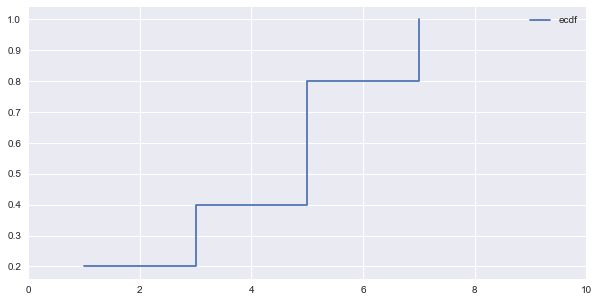

In [223]:
ax = df_counts[['ecdf']].plot(drawstyle='steps-post')
ax.set_xlim(0,10)

The graph has a major flaw: it suddenly starts at the smallest recorded outcome, and stops at the largest recorded outcome, even though the ECDF is actually defined on the whole real line. We want to draw the graph for the whole plot range, which for our example above means that we want to plot the ECDF from `x=0` to `x=10`.

Therefore, we copy the `'ecdf'` column of the dataframe `df_counts` to a dataframe `df_ecdf` and add two more $x$-values to the dataframe `df_ecdf` together with the corresponding value of the ECDF: 
* one value of $x$ much smaller than the smallest recorded outcome, e.g. $x = -2000$, so the ECDF in that point is $\mathrm{ECDF}(-2000) = 0$. 
* one value of $x$ much larger than the largest recorded outcome, e.g. $x = 2000$, so the ECDF in that point is $\mathrm{ECDF}(2000) = 1$.

> **Note:** The precise values $x=-2000$ and $x=2000$ are not important. For the plotting it only matters that the first value is smaller than the left boundary of the plot, and the second is larger than the right boundary. We choose our values _much_ smaller and _much_ larger respectively, so that we don't have to change the values if we change our mind about our desired plot range.

In [224]:
df_ecdf = df_counts[['ecdf']].copy()
df_ecdf.loc[-2000,'ecdf'] = 0
df_ecdf.loc[2000,'ecdf'] = 1
df_ecdf

,ecdf
1,0.2
3,0.4
5,0.8
7,1.0
-2000,0.0
2000,1.0


We sort once more the dataframe by the index.

In [225]:
df_ecdf.sort_index(inplace=True)
df_ecdf

,ecdf
-2000,0.0
1,0.2
3,0.4
5,0.8
7,1.0
2000,1.0


Now we are finally ready to plot the ECDF. 

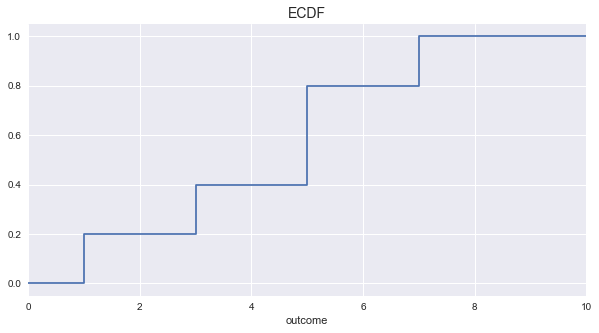

In [226]:
ax = df_ecdf['ecdf'].plot( drawstyle ='steps-post' )
ax.set_xlim(0, 10)
ax.set_xlabel('outcome')
ax.set_title('ECDF', fontsize=14);

## Exercises: compare ECDFs for mouse a trackpad trajectories

To get more insight into the differences in total times needed to reach a target by using a mouse versus a trackpad, we aim to plot both the ECDF for the total times for the mouse trajectories and the ECDF for the trackpad trajectories in one figure. This is a rather big task, and we split it up in several exercises for the mouse trajectories. Afterwards, you can apply the same steps for the trackpad trajectories.

### Exercise <span class="exercise">3.a</span>

Use the dataframe `df_user_trial_props` to create a dataframes `df_mouse`. The dataframe `df_mouse` should contain the total time of all trajectories that were recorded with a **mouse**. 

In [231]:
#// BEGIN_TODO [DAS_3a] Total times mouse trajectories (1 point)

mouses = df_user_trial_props['input_method'] == 'mouse'
df_mouse = df_user_trial_props[mouses]

#columns = ['delay', 'input_method', 'target_radius', 'target_x', 'target_y']
df_mouse = df_mouse.drop('delay', axis=1)
df_mouse = df_mouse.drop('input_method', axis=1)
df_mouse = df_mouse.drop('target_radius', axis=1)
df_mouse = df_mouse.drop('target_x', axis=1)
df_mouse = df_mouse.drop('target_y', axis=1)
# Use:
# columns = ['Col1', 'Col2', ...]
# df.drop(columns, inplace=True, axis=1)

#// END_TODO [DAS_3a]

df_mouse.head()

total_time
user trial            
1226 20       1.045089
     21       1.078394
     22       1.866229
     23       0.959770
     24       1.022803

### Exercise <span class="exercise">3.b</span>

Create a dataframe `df_mouse_counts` indexed by all total times occurring in the dataframe `df_mouse`. The dataframe `df_mouse_counts` should contain one column, labeled `'counts'`, which contains how often that total time occurs in `df_mouse`. Make sure that the indices are sorted.

In [244]:
#// BEGIN_TODO [DAS_3b] Count occurences total times (1 point)

# df_experiment['outcome'].value_counts()
# df_counts = pd.DataFrame( df_experiment['outcome'].value_counts().rename('counts') )
# df_counts.sort_index(inplace=True)

df_mouse_counts = pd.DataFrame( df_mouse['total_time'].value_counts().rename('counts'))
df_mouse_counts.sort_index(inplace=True)
#df_mouse_counts['total_time'] = df_mouse['total_time']
#df_nasdaq = df_nasdaq.set_index('Date')[['Close']]
#df_mouse_counts = df_mouse_counts.set_index('total_time')[['total_time']]

#df_mouse_counts.sort_index(inplace=True)

#// END_TODO [DAS_3b]

df_mouse_counts.head()

,counts
0.517859,1
0.546003,1
0.581902,1
0.593452,1
0.607618,1


### Exercise <span class="exercise">3.c</span>

Add a column labeled `'ecdf'` to the dataframe `df_mouse_counts`, containing the value of the ECDF evaluated at the time in the index.

In [246]:
#// BEGIN_TODO [DAS_3c] Add column with ECDF (1 point)

# df_counts['ecdf'] = df_counts['counts'].cumsum() / df_counts['counts'].sum()
df_mouse_counts['ecdf'] = df_mouse_counts['counts'].cumsum() / df_mouse_counts['counts'].sum()

#// END_TODO [DAS_3c]

df_mouse_counts.head()

,counts,ecdf
0.517859,1,0.000061
0.546003,1,0.000121
0.581902,1,0.000182
0.593452,1,0.000242
0.607618,1,0.000303


### Exercise <span class="exercise">3.d</span>

Copy the `'ecdf'` column of the dataframe `df_mouse_counts` to a new dataframe `df_mouse_ecdf`. Add two new values of the ECDF to this dataframe, one at a very large negative time, and one at a very large positive time, let's say at time $-2000$ s and $2000$ s. Make sure that the index of the dataframe is sorted.

In [247]:
#// BEGIN_TODO [DAS_3d] Add new values to ECDF dataframe (1 point)
# df_ecdf = df_counts[['ecdf']].copy()
# df_ecdf.loc[-2000,'ecdf'] = 0
# df_ecdf.loc[2000,'ecdf'] = 1


df_mouse_ecdf = df_mouse_counts[['ecdf']].copy()
df_mouse_ecdf.loc[-2000,'ecdf'] = 0
df_mouse_ecdf.loc[2000,'ecdf'] = 1

df_mouse_ecdf.sort_index(inplace=True)

# df_user_props['right_handed'] = df_user_props['right_handed'].astype(int)
#df_mouse_ecdf['ecdf'] = df_mouse_ecdf['ecdf'].astype(int)

#// END_TODO [DAS_3d]

df_mouse_ecdf.head()

,ecdf
-2000.000000,0.000000
0.517859,0.000061
0.546003,0.000121
0.581902,0.000182
0.593452,0.000242


> **Note:** When you are working towards a goal (such as plotting an ECDF) and you need to make multiple steps, it is good to regularly display some intermediate results to see whether everything looks as expected. Exactly for this reason, we have called the `head()` function at the end of each code cell. However, after this exercise, we would also like to know whether the value of the ECDF at time $2000$ s is inserted correctly.

### Exercise <span class="exercise">3.e</span>

Also display the last five rows of the dataframe `df_mouse_ecdf`. 

> **Hint:** just like the function `head()` displays the first five rows of a dataframe, the function `tail()` displays the last five rows.

In [95]:
#// BEGIN_TODO [DAS_3e] Display last five rows ECDF dataframe (1 point)

df_mouse_ecdf.tail()

#// END_TODO [DAS_3e]

,ecdf
53.499519,0.409322
65.155427,0.403814
76.857272,0.071852
131.273690,0.270278
2000.000000,1.000000


Does everything look okay? Then let's follow the same steps for the trackpad trials.

### Exercise <span class="exercise">3.f</span>
    
Create a dataframe `df_trackpad_ecdf` indexed by all total times occurring in **trackpad** trajectories, an additional very large negative time and a very large positive time, and with a column `'ecdf'` containing the value of the ECDF at these times. We advise you to use multiple code cells and regularly display output to check whether everything looks as expected.

In [248]:
#// BEGIN_TODO [DAS_3f] Create ECDF for trackpkad trajectories (2 points)
#mouses 3a-d
# mouses = df_user_trial_props['input_method'] == 'mouse'
# df_mouse = df_user_trial_props[mouses]

# df_mouse_counts = pd.DataFrame( df_mouse['total_time'].value_counts().rename('counts'))

# df_mouse_counts['ecdf'] = df_mouse_counts['counts'].cumsum() / df_mouse_counts['counts'].sum()


# df_mouse_ecdf = df_mouse_counts[['ecdf']].copy()
# df_mouse_ecdf.loc[-2000,'ecdf'] = 0
# df_mouse_ecdf.loc[2000,'ecdf'] = 1

# df_mouse_ecdf.sort_index(inplace=True)

df_mouse_counts.sort_index(inplace=True)

#trackpads 3f
trackpads = df_user_trial_props['input_method'] == 'trackpad'
df_trackpad = df_user_trial_props[trackpads]

df_trackpad_counts = pd.DataFrame( df_trackpad['total_time'].value_counts().rename('counts'))
df_trackpad_counts.sort_index(inplace=True)

df_trackpad_counts['ecdf'] = df_trackpad_counts['counts'].cumsum() / df_trackpad_counts['counts'].sum()

df_trackpad_ecdf = df_trackpad_counts[['ecdf']].copy()
df_trackpad_ecdf.loc[-2000,'ecdf'] = 0
df_trackpad_ecdf.loc[2000,'ecdf'] = 1

df_trackpad_ecdf.sort_index(inplace=True)

In [249]:
#// END_TODO [DAS_3f]

df_trackpad_ecdf.head()

,ecdf
-2000.000000,0.000000
0.631266,0.000059
0.635076,0.000119
0.656173,0.000178
0.667644,0.000238


Time to see the results... 

### Exercise <span class="exercise">3.g</span>

Plot in one figure:

* the ECDF of the total time used for the **mouse** trials
* the ECDF of the total time used for the **trackpad** trials

Make sure the $x$-axis runs from $0$ to $4$ (s), and include a legend explaining which graph corresponds to the mouse, and which corresponds to the trackpad. 

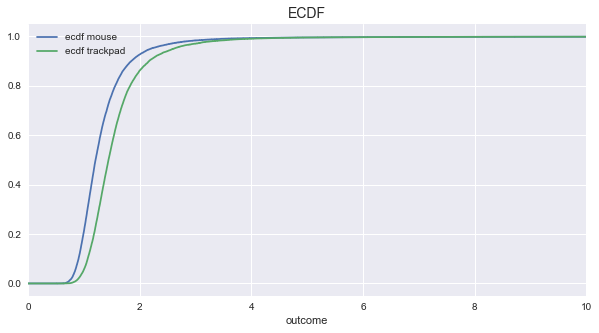

In [250]:
#// BEGIN_TODO [DAS_3g] Plot ECDFs (1 point)

# ax = df_ecdf['ecdf'].plot( drawstyle ='steps-post' )
# ax.set_xlim(0, 10)
# ax.set_xlabel('outcome')
# ax.set_title('ECDF', fontsize=14);

ax = df_mouse_ecdf['ecdf'].plot( drawstyle ='steps-post' )
df_trackpad_ecdf['ecdf'].plot( drawstyle ='steps-post', ax=ax )
ax.set_xlim(0, 10)
ax.set_xlabel('outcome')
ax.set_title('ECDF', fontsize=14)
ax.legend(['ecdf mouse', 'ecdf trackpad']);
# ax_combined.legend(['GOOG', 'AMZN']);

#// END_TODO [DAS_3g]

# <span class="section">4.</span> Dates and Times

## Learning Objectives of This Section

After this lesson, you should

* understand the complication with **dates** and **times**
* know how to deal with **dates** and **times** using Pandas **`Timestamp`**

## Why dates and times are complicated

_Dates_ and _times_ are surrounded by all kinds of peculiarities
that can make their processing a challenge.

* Various countries and regions use their own **calendars**
    to organize time on the level of days, months, and years.
    
    "There are seven calendars in regular current use around the world.
    They are the Gregorian, the Chinese, the Hebrew, the Islamic, the Persian,
    the Ethiopian and the Balinese Pawukon."
    Source: [Calendopedia](https://calendopedia.com/modern.htm)


* We need **leap years**, and even **leap seconds**, to compensate for the fact that
    the period of the Earth's motion around the Sun (the length of a year)
    is not an integral multiple of
    the period of the Earth's rotation about its axis (the length of a day).

* The time of day depends on the location on Earth,
    which is organized into **time zones**.
    
* With **Daylight Saving Time**,
    some clock readings are either skipped or passed twice on a particular day.

* There are differences in **granularity** that may be needed when measuring time:
    A date without time-of-day,
    or time-of-day in hours:minutes without date or seconds.
    
* There is a difference between **point in time**,
    **time interval** (having concrete time points as start and end), and
    **time duration** (capturing just the length of a time interval).

* Dates and times need to be communicated, and there are various notations.
    Of particular interest is the international standard
    [**ISO 8601**](https://en.wikipedia.org/wiki/ISO_8601). For instance, the numeric form `YYYY-MM-DD` is an ISO 8601 date.

## Working with dates and times with Pandas

The _Pandas_ library can handle a lot of the intricacies of working with date times for you. You can store dates and times in **`Timestamp`** objects. For instance, the first lecture of this course is/was at February 4, 2019, at 8:45 am. We can create a **`Timestamp`** object for this date by using the _Pandas_ function **`pd.to_datetime()`**, and apply it to the string `'2019/02/04 08:45'`.

In [99]:
ts = pd.to_datetime('2019/02/04 08:45')
ts

Timestamp('2019-02-04 08:45:00')

We can now use the `Timestamp` object to extract all kinds of information about this date. For instance, we can extract the month of the `Timestamp` with the attribute `ts.month`.

In [100]:
ts.month

2

Similarly, we can extract the following attributes
* **`ts.year`**: year
* **`ts.month`**: month
* **`ts.day`**: day (of the month)
* **`ts.dayofweek`**: day of the week (Monday corresponds to `0`)
* **`ts.weekday_name`**: day of the week as a string.
* **`ts.quarter`**: quarter (of the year)
* **`ts.timestamp()`**: convert to POSIX timestamp, a floating-point number
    with 1 second as unit

So far we have not specified the time zone for the date time. We can set the time zone to the time zone in the Netherlands using the function **`tz_localize()`** with the argument `'Europe/Amsterdam'`.

In [101]:
ts_with_tz = ts.tz_localize('Europe/Amsterdam')

Between international parties, times are often communicated in UTC time (see [Coordinated Universal Time](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) for more information), sometimes called Greenwich Mean Time (GMT). We can convert the time zone to UTC time by the function **`tz_convert()`** with the argument `'utc'`.

In [102]:
ts_utc = ts_with_tz.tz_convert('utc')
ts_utc

Timestamp('2019-02-04 07:45:00+0000', tz='UTC')

To get a `Timestamp` object with the current time, you can write

In [103]:
pd.Timestamp.now()

Timestamp('2019-03-14 15:47:07.682442')

You can also get the current time in UTC time with

In [104]:
pd.Timestamp.utcnow()

Timestamp('2019-03-14 14:47:09.591427+0000', tz='UTC')

You can find further information about `Timestamp` objects in the [documentation of `Timestamp`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html).

### Exercise <span class="exercise">4.a</span>: 

The famous Dutch computer scientist _Edsger Dijkstra_ worked at the Eindhoven University from 1962 to 1984. He was born on May 11, 1930. Use _Pandas_ to check on which day of the week Dijkstra was born. Store the name of the day as a **string**  in the variable `day_Dijkstra_born`.

In [140]:
#// BEGIN_TODO [DAS_4a] Dijkstra's birth day (1 point)

#ts = pd.to_datetime('2019/02/04 08:45')

td = pd.to_datetime('1930/05/11')
day_Dijkstra_bor = td.dayofweek
day_Dijkstra_born = 'Sunday'

#// END_TODO [DAS_4a]

day_Dijkstra_born

'sunday'

### Exercise <span class="exercise">4.b</span>

Consider again the NASDAQ index. In which pair of year and month was the monthly increase of the index the highest (e.g. in January 2010)? Store your answer in the variables `year_max` (as a number) and `month_max` (as a number).

> Note: the dates in the index of the `df_nasdaq` dataframe (accessible through `df_nasdaq.index`) can already be viewed as Timestamp objects

In [232]:
#// BEGIN_TODO [DAS_4b] Greatest jump (1 point)

# #maxi = df_nasdaq['abs_change'].max()
# maxbool = df_nasdaq['abs_change'] == df_nasdaq['abs_change'].max()
# df_nasdaq[maxbool]

# #df_nasdaq[2016-06-24].year

# year_max = 2016
# month_max = 'June'

df_grouped = df_nasdaq.groupby([df_nasdaq.index.year, df_nasdaq.index.month])[['close_diff']].sum()
date = df_grouped.idxmax()
date
year_max = 2015
month_max = 10

#// END_TODO [DAS_4b]

year_max, month_max

(2015, 10)

# <span class="section">5.</span> Exercise: Find ballistic motion

In this exercise, we will return to the recorded path, stored in `df_last_path` and will extract one more feature, which was already mentioned in the lecture: we are going to extract the _ballistic part_ of the mouse trajectory. This is quite challenging, so do not hesitate to ask your tutor for hints.

> Reminder: the code you are going to write below should work every time you record a new mouse trajectory. Momotor will test whether it correctly extracts the ballistic motion for a few different mouse trajectories.

> If you record a new path, be sure to also recompute the filtered paths `filt_x`, `filt_y`, the path length and the approximate, filtered speed.

The ballistic part of the motion is the motion restricted to a certain time-interval (from `i_left` to `i_right`) around the time `i_max` at which the speed is maximal, as illustrated by the following picture.

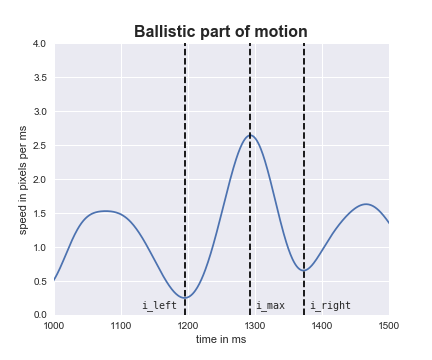

Here is a picture of the corresponding path, where the ballistic part of the motion is indicated in black.

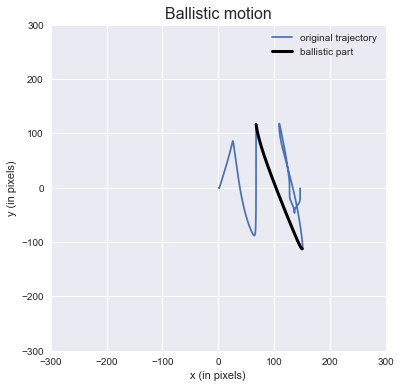

We want to use _Pandas_ to extract this ballistic part of the trajectory. For that, we need a _very precise definition_. The precise definition of the _ballistic_ part of the mouse trajectory is as follows: we first find the index `i_max` for which the (approximate, filtered) _speed_ is maximal (if there are multiple such indices, we take the smallest). Then, we define the range of indices from `i_left` to `i_right` as the largest range of indices containing `i_max` such that the speed is _increasing_ from `i_left` to `i_max` and _decreasing_ from `i_max` to `i_right`. The _ballistic_ part of the mouse trajectory is defined as the mouse trajectory restricted to the range from `i_left` to `i_right`.

In other words, `i_left` is the smallest index such that for every index `i` between `i_left`  and `i_max` the approximate speed at `i` is _larger than or equal to_ the approximate speed at `i-1`. Similarly, `i_right` is the largest index such that for every `i` between `i_max + 1` and `i_right` (not including `i_right`), the approximate speed at `i` is _smaller than or equal to_ the approximate speed at `i-1`.

Our goal will be to find `i_left` and `i_right` for the trajectory in `df_last_path`. We will afterwards define the dataframe `df_ballistic` as `df_last_path[i_left:i_right]`.

### Exercise <span class="exercise">5.a</span>

Find the index `i_max` for which the (approximate, filtered) _speed_ (computed in <span class="reference" ref="approximate_speed"><a href="#approximate_speed">Exercise 1.g</a></span>) is maximal.

In [141]:
#// BEGIN_TODO [DAS_5a] Find i_max (1 point)

# #code 1g
# #gaussian filter (df_nasdaq['close_filtered_deriv'] = gaussian_filter1d(df_nasdaq['close'], sigma=30, order=1, mode='nearest'))
# #speed = path length / time
# df_last_path['approximate_speed'] = (gaussian_filter1d(df_last_path['path_length'], sigma=25, order=1, mode='nearest')) #/ df_last_path['t'])

# ax_last_path = df_last_path.plot(x='t', y='approximate_speed')
# #ax_last_path.set_xlim(-300,300)
# #ax_last_path.set_ylim(-300,300)
# ax_last_path.set_title('Speed last path')
# ax_last_path.set_ylabel('Path length (pixels)')
# ax_last_path.set_xlabel('Time (ms)');



#// END_TODO [DAS_5a]

df_last_path[['t','trial','filt_x','filt_y','approximate_speed']][i_max-2:i_max+3]

The approximate speed should be maximal for the row in the middle, which indeed should correspond to `i_max`.

In [143]:
i_max

### Exercise <span class="exercise">5.b</span>

Add a column labeled `'speed_diff'` to the dataframe `df_last_path`, containing in every row the difference between the approximate speed in that row and the approximate speed in the previous row.

In [147]:
#// BEGIN_TODO [DAS_5b] Add speed_diff (1 point)

df_last_path['speed_diff'] = df_last_path['approximate_speed'].diff()

#// END_TODO [DAS_5b]

df_last_path[['t','trial','filt_x','filt_y','approximate_speed','speed_diff']].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,t,trial,filt_x,filt_y,approximate_speed,speed_diff
0,0.000,66,4.000000,0.0,0.006870,NaN
1,0.001,66,3.986251,0.0,0.007089,0.000220
2,0.002,66,3.972502,0.0,0.007309,0.000219
3,0.003,66,3.958752,0.0,0.007527,0.000219
4,0.004,66,3.945003,0.0,0.007745,0.000218


### Exercise <span class="exercise">5.c</span>

Find `i_left`, the smallest index such that for every index `i` between `i_left` and `i_max` the approximate speed at `i` is _larger than or equal to_ the approximate speed at `i-1`.

> **Hint:** First use slicing and the index `i_max` to make a new dataframe `df_first_path` which only contains the rows up to (and including) the index `i_max`. Next, use the column `'speed_diff'` created before to select only those rows `i` for which the speed at `i-1` is strictly less than the speed at `i`. You can use this last dataframe to find out what `i_left` should be.

In [148]:
#// BEGIN_TODO [DAS_5c] Find i_left (1 point)

df_first_path = df_last_path.loc[0:i_max]
bm_ileft = df_first_path['speed_diff'] < 0
i_left = (df_first_path[bm_ileft].index[-1]) +1

#// END_TODO [DAS_5c]

i_left

NameError: name 'i_max' is not defined

The following code cell can give you a quick (although not a full) check of your work. If everything worked out, the value in the column `'speed_diff'` should be less than zero in the first row, and larger than or equal to zero in the other rows.

In [146]:
df_last_path[['t','trial','filt_x','filt_y','approximate_speed','speed_diff']][i_left-1:i_left+4]

KeyError: "['speed_diff'] not in index"

### Exercise <span class="exercise">5.d</span>

Find `i_right`, the largest index such that for every index `i` between `i_max + 1` and `i_right` (not including `i_right`) the approximate speed at `i` is _smaller than or equal to_ the approximate speed at `i-1`.

In [155]:
#// BEGIN_TODO [DAS_5d] Find i_right (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [DAS_5d]

i_right

NameError: name 'i_right' is not defined

The next code cell can give you a quick (although not a full) check of your work. If everything worked out, the value in the column `'speed_diff'` should be larger than zero in the last row, and less than or equal to zero in the other rows.

In [156]:
df_last_path[['t','trial','filt_x','filt_y','approximate_speed','speed_diff']][i_right-4:i_right+1]

NameError: name 'i_right' is not defined

Now we are ready to define `df_ballistic`.

In [157]:
df_ballistic = df_last_path[i_left:i_right]
df_ballistic.head()

NameError: name 'i_left' is not defined

In [158]:
df_ballistic.tail()

NameError: name 'df_ballistic' is not defined

### Exercise <span class="exercise">5.e</span>: Indicate ballistic motion in trajectory

Plot the full, filtered, mouse trajectory (with coordinates `'filt_x'` and `'filt_y'`) in `df_last_path` in blue, and on top of it indicate the ballistic motion with a thick, black curve (i.e. with `linewidth` equal to `3`).

In [159]:
#// BEGIN_TODO [DAS_5e] Plot ballistic motion (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [DAS_5e]

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [149]:
#// BEGIN_TODO [Feedback_1] (0 point)

feedback_time = 10

#// END_TODO [Feedback_1] (0 point)

import numbers
assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
feedback_time

10

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 1 - 10, with 1 being very easy.

In [150]:
#// BEGIN_TODO [Feedback_2] (0 point)

feedback_difficulty = 8

#// END_TODO [Feedback_2] (0 point)

import numbers
assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
feedback_difficulty

8

### (Optional) What did you like?

Assign a string to `feedback_like`.

In [151]:
#// BEGIN_TODO [Feedback_3] (0 point)

feedback_like = ''

#// END_TODO [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`.

In [152]:
#// BEGIN_TODO [Feedback_4] (0 point)

feedback_improve = ''

#// END_TODO [Feedback_4] (0 point)




## How to submit your work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.

2. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.

3. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.

* In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  
* If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.


---

In [153]:
# List all defined names
%whos

Variable                Type               Data/Info
----------------------------------------------------
AUTHOR_DATE             str                2019-03-11
AUTHOR_ID_NR            str                1349171
AUTHOR_NAME             str                Kyra Moviat
ECDF                    type               <class 'statsmodels.distr<...>rical_distribution.ECDF'>
MouseExperiment         type               <class 'mouse_experiment.MouseExperiment'>
ax                      AxesSubplot        Axes(0.125,0.125;0.775x0.755)
ax_deriv                AxesSubplot        Axes(0.125,0.2;0.775x0.68)
ax_last_path            AxesSubplot        Axes(0.125,0.125;0.775x0.755)
ax_marg                 AxesSubplot        Axes(0.125,0.2;0.775x0.68)
ax_nasdaq               AxesSubplot        Axes(0.125,0.2;0.775x0.68)
ax_paths                AxesSubplot        Axes(0.125,0.125;0.775x0.755)
ax_pathss               AxesSubplot        Axes(0.125,0.125;0.775x0.755)
ax_pathsss              AxesSubplot        Axes

---

# (End of Notebook)

&copy; 2017-2019 - **TU/e** - Eindhoven University of Technology